In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
diabetes = datasets.load_diabetes()

In [59]:
data = pd.DataFrame(diabetes.data, columns=[diabetes.feature_names])
target = pd.DataFrame(diabetes.target)

In [60]:
X = diabetes.data[:, np.newaxis, 2]
y = np.array(target)

In [61]:
target.head(5)

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [63]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[975.27698313]]
lr.intercept_: [152.07653297]


In [64]:
y_pred = lr.predict(X_test)
print("Coefficient of Determination R Squared: %.2f" % r2_score(y_test, y_pred))

Coefficient of Determination R Squared: 0.32


<function matplotlib.pyplot.show(close=None, block=None)>

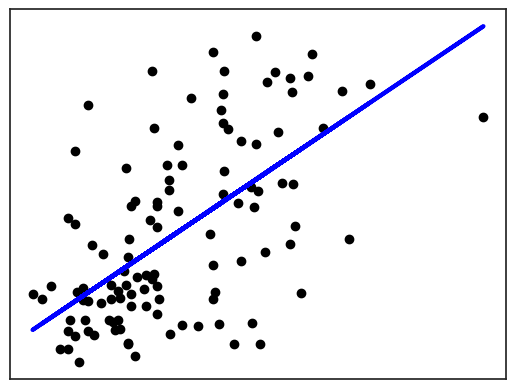

In [65]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show

# Tasks

1) Plot below

2) a) the coefficients are: 
    y-intercpet = 152
    gradient = 975
this gives a model of $y=975{\times}BMI+152$

    b) the ${R^2}$ = 0.32, this shows that the value y is explained by 32% of the model.

    c) This is not a good model as the ${R^2}$ value is quite low.

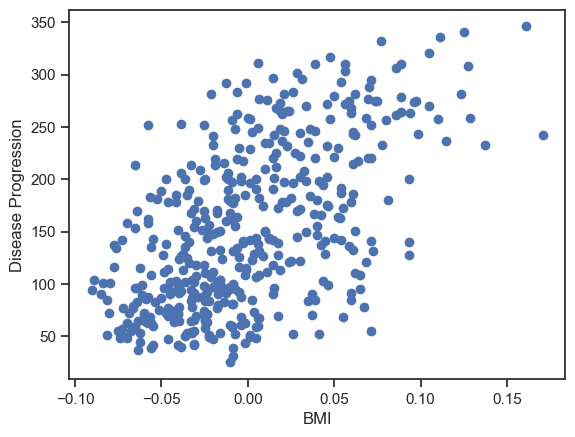

In [66]:
plt.plot(data['bmi'],target,'o')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.show()


In [67]:
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures

In [68]:
def load_extended_boston():
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2,:], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    
    
    X = MinMaxScaler().fit_transform(data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, target

In [69]:
X, y = load_extended_boston()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


# Tasks

1) a) 0.61

b) The training set is used to create the model the testing set is a seperate set of values that then tests the accuracy of the model in a real way.

c) The model shows a test score lower than that of the training score this is likely due to overfitting. So the model may be too good a fit for the training data. 

In [71]:
from sklearn.linear_model import Ridge

In [72]:
ridge = Ridge(alpha=1.0).fit(X_train,y_train)

print("Training set score: {:2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:2f}".format(lr.score(X_test,y_test)))
print("Ridge Training set score: {:2f}".format(ridge.score(X_train,y_train)))
print("Ridge test set score: {:2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.952052
Test set score: 0.607472
Ridge Training set score: 0.885797
Ridge test set score: 0.752768


In [73]:
import seaborn as sns

In [74]:
sns.set(style="ticks")

In [77]:
data.head(1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.05068,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646


In [81]:
columns_required = ["age","sex","bmi","bp"]
test_data = data[columns_required].copy()

test_data.head(1)

,age,sex,bmi,bp
0,0.038076,0.05068,0.061696,0.021872


ValueError: If using all scalar values, you must pass an index

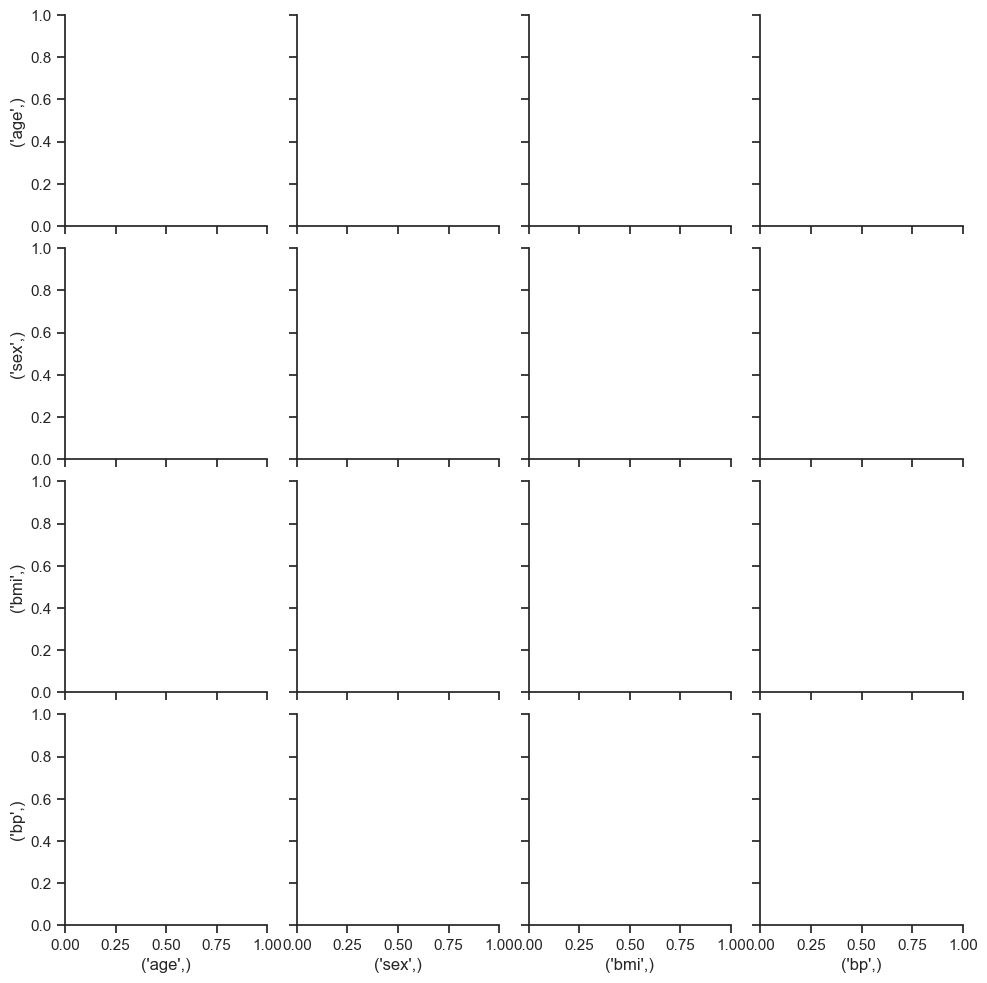

In [82]:
sns.pairplot(test_data)
show.plt()